In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

In [2]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
num_particles = 500
num_turns = 1000

In [4]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [5]:
# Insert monitors as bpms
env = line.env
insertions = []
monitors_elems = []
for name in bpms_hor:
    monitors_elems.append(xt.ParticlesMonitor(_context=line._context, 
                                                          num_particles=num_particles, 
                                                          start_at_turn=0, 
                                                          stop_at_turn=num_turns+1))
    env.elements[f'{name}_monitor'] = monitors_elems[-1]
    insertions.append(env.place(f'{name}_monitor', at=line.get_s_position(name)))
line.insert(insertions, s_tol=1e-6)

Slicing line:   0%|          | 0/3848 [00:00<?, ?it/s]

In [6]:
part = line.build_particles(
    x = tw.particle_on_co.x[0]*np.ones(num_particles),
    px = tw.particle_on_co.px[0]*np.ones(num_particles),
    y = tw.particle_on_co.y[0]*np.ones(num_particles),
    py = tw.particle_on_co.py[0]*np.ones(num_particles),
    zeta = tw.particle_on_co.zeta[0]*np.ones(num_particles),
    delta = np.linspace(-0.01, 0.01, num_particles)
)

In [8]:
part2 = line.build_particles(
    x = tw.particle_on_co.x[0]*np.ones(num_particles),
    px = tw.particle_on_co.px[0]*np.ones(num_particles),
    y = tw.particle_on_co.y[0]*np.ones(num_particles),
    py = tw.particle_on_co.py[0]*np.ones(num_particles),
    zeta = tw.particle_on_co.zeta[0]*np.ones(num_particles),
    delta = np.linspace(-0.01, 0.01, num_particles)
)

In [7]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))

line.track(part, num_turns=num_turns, with_progress=True)

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.


Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

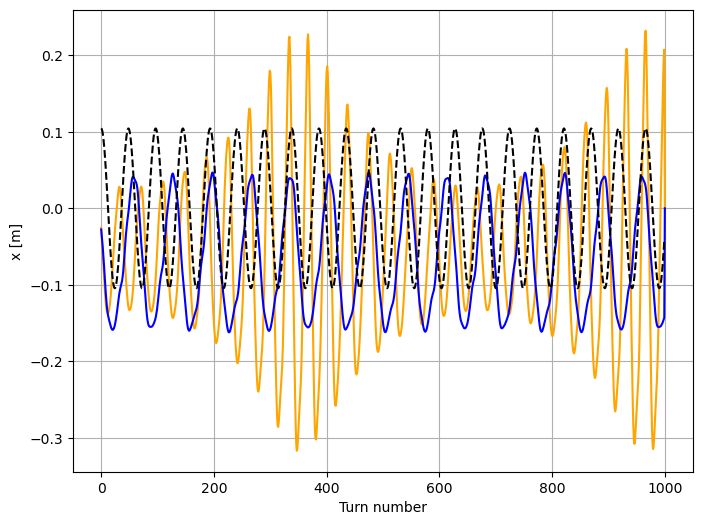

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
# ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[5], color='blue')
ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[20], color='orange') # initial delta is -0.00919192
ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0], color='blue')
ax.plot((np.max(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0])-np.min(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0]))/2 *np.cos(tw.qx%20 * np.arange(num_turns)), 'k--')
ax.set_xlabel('Turn number')
ax.set_ylabel('x [m]')
ax.grid()

In [134]:
line.element_dict[f'{bpms_hor[0]}_monitor'].delta[20,0], line.element_dict[f'{bpms_hor[0]}_monitor'].delta[477,0]

(np.float64(-0.009198396793587138), np.float64(0.009118236472945851))

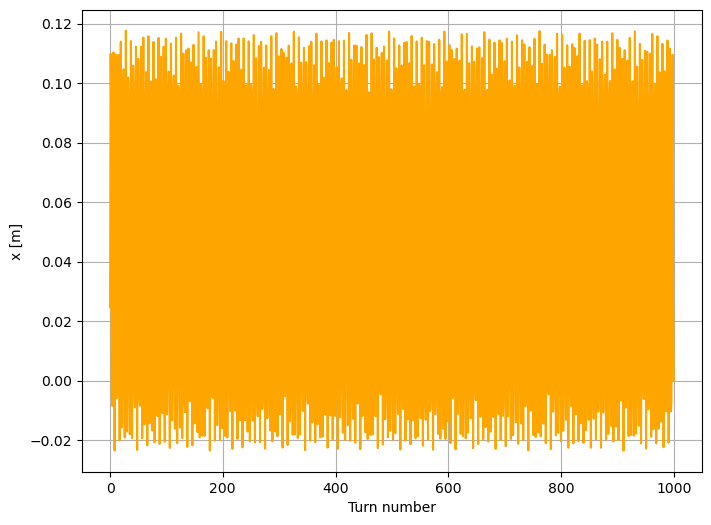

In [135]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
# ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[5], color='blue')
ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[477], color='orange') # initial delta is -0.00919192
# ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0], color='blue')
# ax.plot((np.max(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0])-np.min(line.element_dict[f'{bpms_hor[0]}_monitor'].x[0]))/2 *np.cos(tw.qx%20 * np.arange(num_turns)), 'k--')
ax.set_xlabel('Turn number')
ax.set_ylabel('x [m]')
ax.grid()

In [30]:
idx_res = 20 # range to be determined

## Evolution of the tunes
Defined as the max of the spectral content

In [32]:
deltas = np.linspace(-0.01, 0.01, num_particles)

In [42]:
fourier_coeffs_x = []
fourier_coeffs_y = []
fourier_coeffs_s = []
for i in range(num_particles):
    freq_cont = np.fft.fft(line.element_dict[f'{bpms_hor[0]}_monitor'].x[i]+1j*line.element_dict[f'{bpms_hor[0]}_monitor'].px[i])
    fourier_coeffs_x.append(np.abs(freq_cont))
    freq_cont = np.fft.fft(line.element_dict[f'{bpms_hor[0]}_monitor'].y[i]+1j*line.element_dict[f'{bpms_hor[0]}_monitor'].py[i])
    fourier_coeffs_y.append(np.abs(freq_cont))
    freq_cont = np.fft.fft(line.element_dict[f'{bpms_hor[0]}_monitor'].zeta[i]+1j*line.element_dict[f'{bpms_hor[0]}_monitor'].delta[i])
    fourier_coeffs_s.append(np.abs(freq_cont))

freq = np.fft.fftfreq(len(freq_cont))

In [107]:
freqs_wrapped = np.where(freq < 0, freq + 1, freq)
sorted_indices = np.argsort(freqs_wrapped)
freq = freq[sorted_indices]

fourier_coeffs_x = np.array(fourier_coeffs_x)[:, sorted_indices]
fourier_coeffs_y = np.array(fourier_coeffs_y)[:, sorted_indices]
fourier_coeffs_s = np.array(fourier_coeffs_s)[:, sorted_indices]

In [103]:
fourier_coeffs_x[0]

array([67.09677461,  1.51692236,  1.54745559, ...,  1.61039079,
        1.55448321,  1.52040764], shape=(1001,))

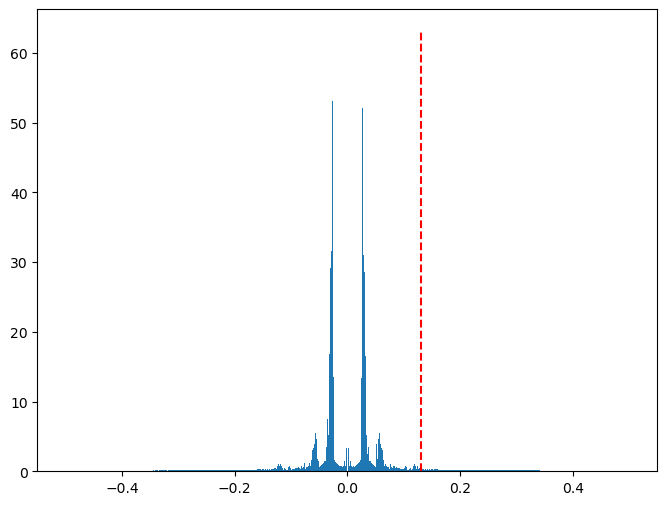

In [108]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
idx= 20
df = freq[1] - freq[0]  # frequency bin width
mask = freq != 0
# ax.bar(freq, fourier_coeffs_x[idx],
#        width=df, align='center')
ax.bar(freq[mask], fourier_coeffs_x[idx][mask],
       width=df, align='center')
ax.vlines(tw.qx%20, ymin=0, ymax=np.max(fourier_coeffs_x[idx]), colors='r', linestyles='dashed', label='Expected tune')

In [110]:
qx = []
qy = []
qs = []
for i in range(num_particles):
    peak_idx_x = np.argmax(fourier_coeffs_x[i][mask]) + 1  # +1 to account for excluding zero frequency
    peak_idx_y = np.argmax(fourier_coeffs_y[i][mask]) + 1
    peak_idx_s = np.argmax(fourier_coeffs_s[i][mask]) + 1
    qx.append(np.abs(freq[peak_idx_x]))
    qy.append(np.abs(freq[peak_idx_y]))
    qs.append(np.abs(freq[peak_idx_s]))

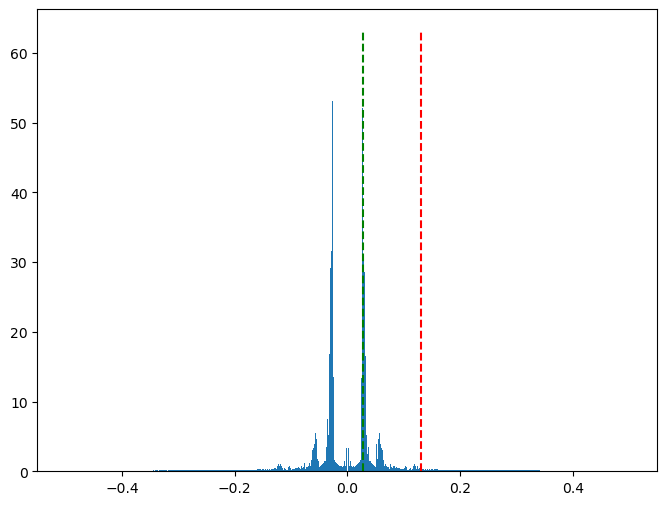

In [111]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
idx= 20
df = freq[1] - freq[0]  # frequency bin width
mask = freq != 0
# ax.bar(freq, fourier_coeffs_x[idx],
#        width=df, align='center')
ax.bar(freq[mask], fourier_coeffs_x[idx][mask],
       width=df, align='center')
ax.vlines(tw.qx%20, ymin=0, ymax=np.max(fourier_coeffs_x[idx]), colors='r', linestyles='dashed', label='Expected tune')
ax.vlines(qx[idx], ymin=0, ymax=np.max(fourier_coeffs_x[idx]), colors='g', linestyles='dashed', label='Extracted tune')

Tune extraction seems to match

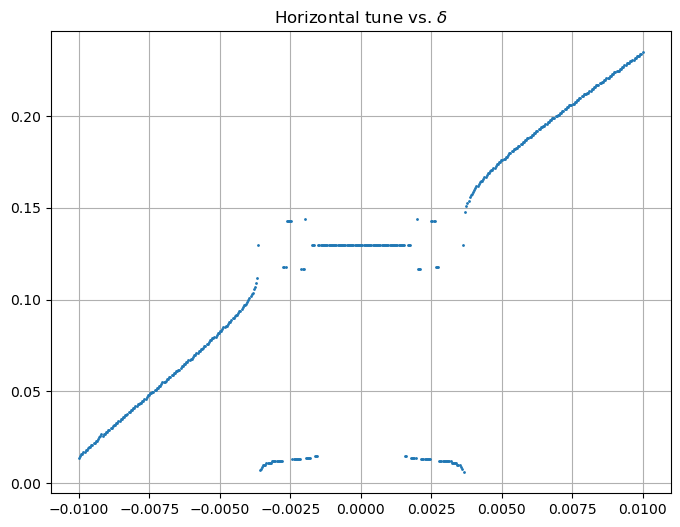

In [112]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(deltas, qx, 'o', markersize=1, label='Horizontal tune')
ax.set_title('Horizontal tune vs. $\\delta$')
ax.grid()

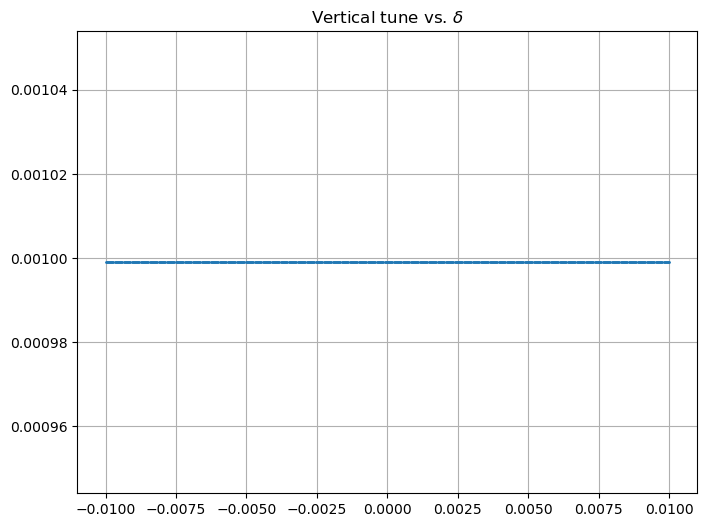

In [114]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(deltas, qy, 'o', markersize=1, label='Vertical tune')
ax.set_title('Vertical tune vs. $\\delta$')
ax.grid()

In [116]:
np.unique(qy), tw.qy

(array([0.000999]), np.float64(20.18009638231108))

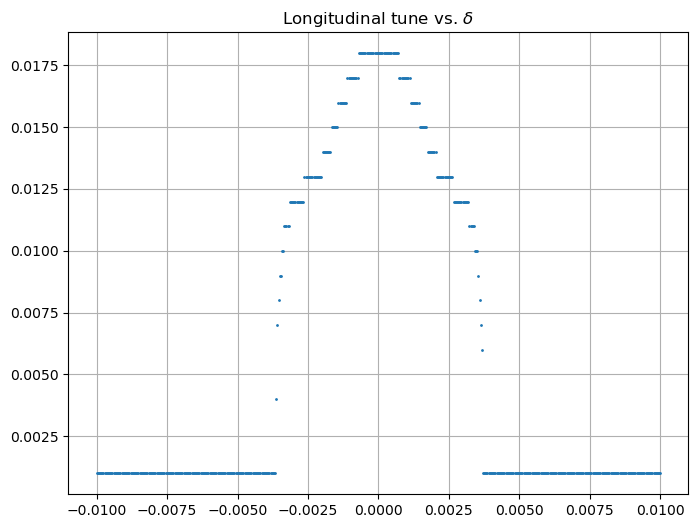

In [113]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(deltas, qs, 'o', markersize=1, label='Longitudinal tune')
ax.set_title('Longitudinal tune vs. $\\delta$')
ax.grid()

## Phase space 

### particle id 20 ($\delta = -0.009198396793587138$)

In [138]:
line.element_dict[f'{bpms_hor[0]}_monitor'].delta[20, 0]

np.float64(-0.009198396793587138)

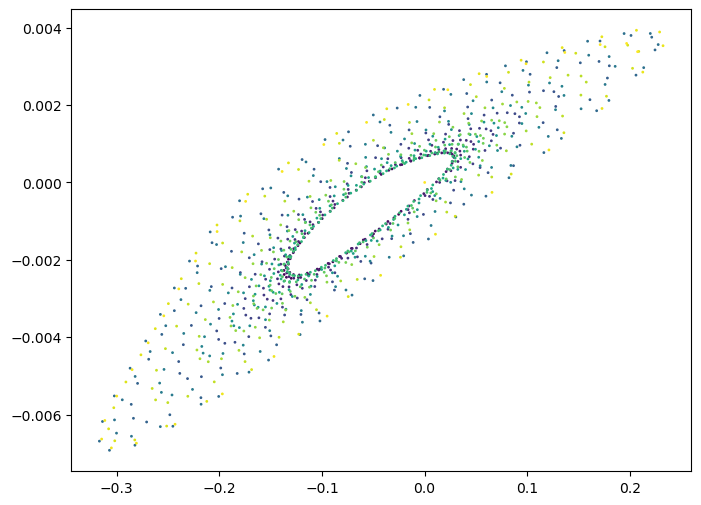

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].x[20], line.element_dict[f'{bpms_hor[0]}_monitor'].px[20], c=np.arange(num_turns+1), cmap=colormap, s=1)


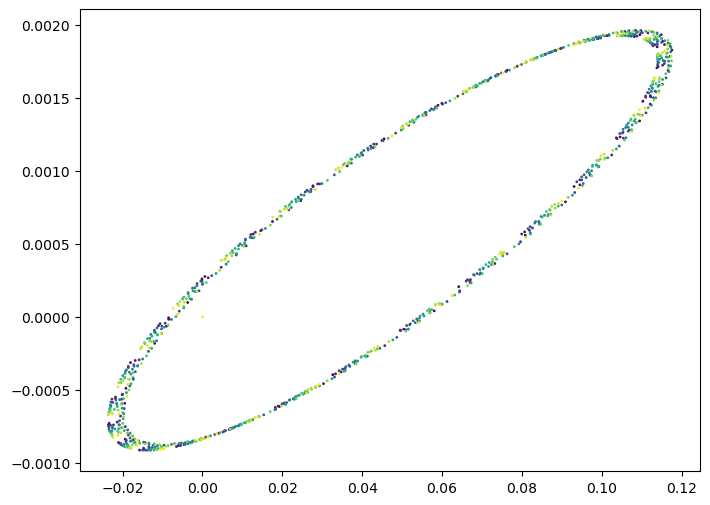

In [136]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].x[477], line.element_dict[f'{bpms_hor[0]}_monitor'].px[477], c=np.arange(num_turns+1), cmap=colormap, s=1)

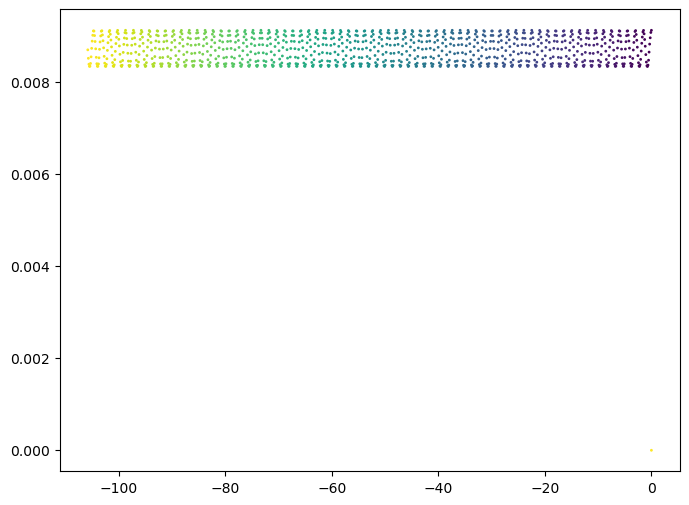

In [137]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].zeta[477], line.element_dict[f'{bpms_hor[0]}_monitor'].delta[477], c=np.arange(num_turns+1), cmap=colormap, s=1)

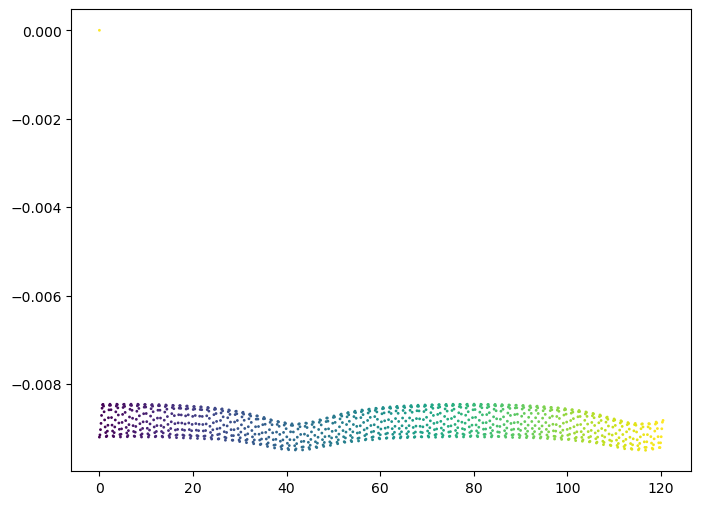

In [121]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].zeta[20], line.element_dict[f'{bpms_hor[0]}_monitor'].delta[20], c=np.arange(num_turns+1), cmap=colormap, s=1)

In [143]:
np.where(np.isclose(line.element_dict[f'{bpms_hor[0]}_monitor'].delta[:, 0], 2.00400802e-05))

(array([250]),)

### On-momentum particle

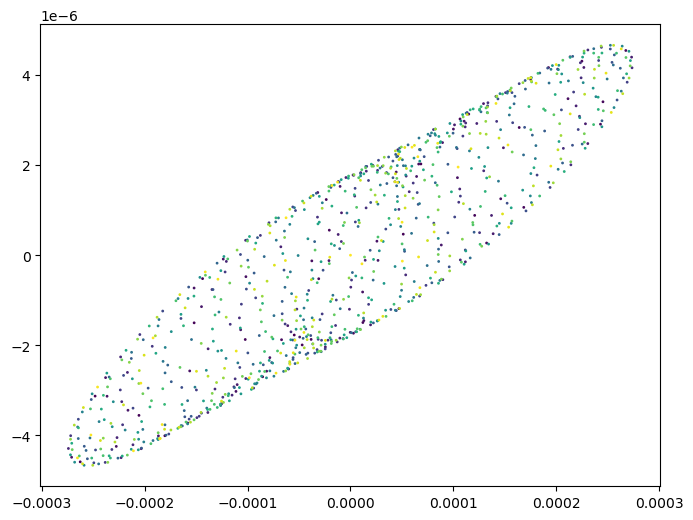

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].x[250], line.element_dict[f'{bpms_hor[0]}_monitor'].px[250], c=np.arange(num_turns+1), cmap=colormap, s=1)

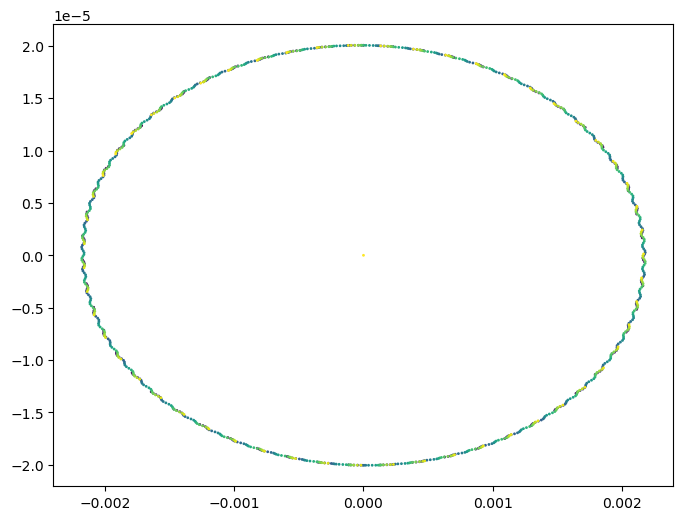

In [145]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
sc = ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].zeta[250], line.element_dict[f'{bpms_hor[0]}_monitor'].delta[250], c=np.arange(num_turns+1), cmap=colormap, s=1)

In [146]:
line.element_dict[f'{bpms_hor[0]}_monitor'].delta[250,0]

np.float64(2.0040080160432794e-05)

In [147]:
tw.particle_on_co.delta[0]  

np.float64(0.0)